<hr style="height:2px;">

# Demo: Apply trained CARE model for denoising of *Tribolium castaneum*

This notebook demonstrates applying a CARE model for a 3D denoising task, assuming that training was already completed via [2_training.ipynb](2_training.ipynb).  
The trained model is assumed to be located in the folder `models` with the name `my_model`.

More documentation is available at http://csbdeep.bioimagecomputing.com/doc/.

In [1]:
import os
import sys

In [2]:
file_dir = os.path.dirname('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/Image_reconstruction/CSBDeep/')
sys.path.append(file_dir)

In [3]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE
from tifffile import imsave
import time


Using TensorFlow backend.


<hr style="height:2px;">

# Download example data

The example data (also for testing) should have been downloaded in [1_datagen.ipynb](1_datagen.ipynb).  
Just in case, we will download it here again if it's not already present.

In [11]:
download_and_extract_zip_file (
    url       = 'http://csbdeep.bioimagecomputing.com/example_data/tribolium.zip',
    targetdir = 'data',
)

Files found, nothing to download.

data:
- tribolium
- tribolium/test
- tribolium/test/GT
- tribolium/test/GT/nGFP_0.1_0.2_0.5_20_14_late.tif
- tribolium/test/low
- tribolium/test/low/nGFP_0.1_0.2_0.5_20_14_late.tif
- tribolium/train
- tribolium/train/GT
- tribolium/train/GT/nGFP_0.1_0.2_0.5_20_13_late.tif
- tribolium/train/low
- tribolium/train/low/nGFP_0.1_0.2_0.5_20_13_late.tif


<hr style="height:2px;">

# Raw low-SNR image and associated high-SNR ground truth

Plot the test stack pair and define its image axes, which will be needed later for CARE prediction.

image size = (45, 954, 486)
image axes = ZYX


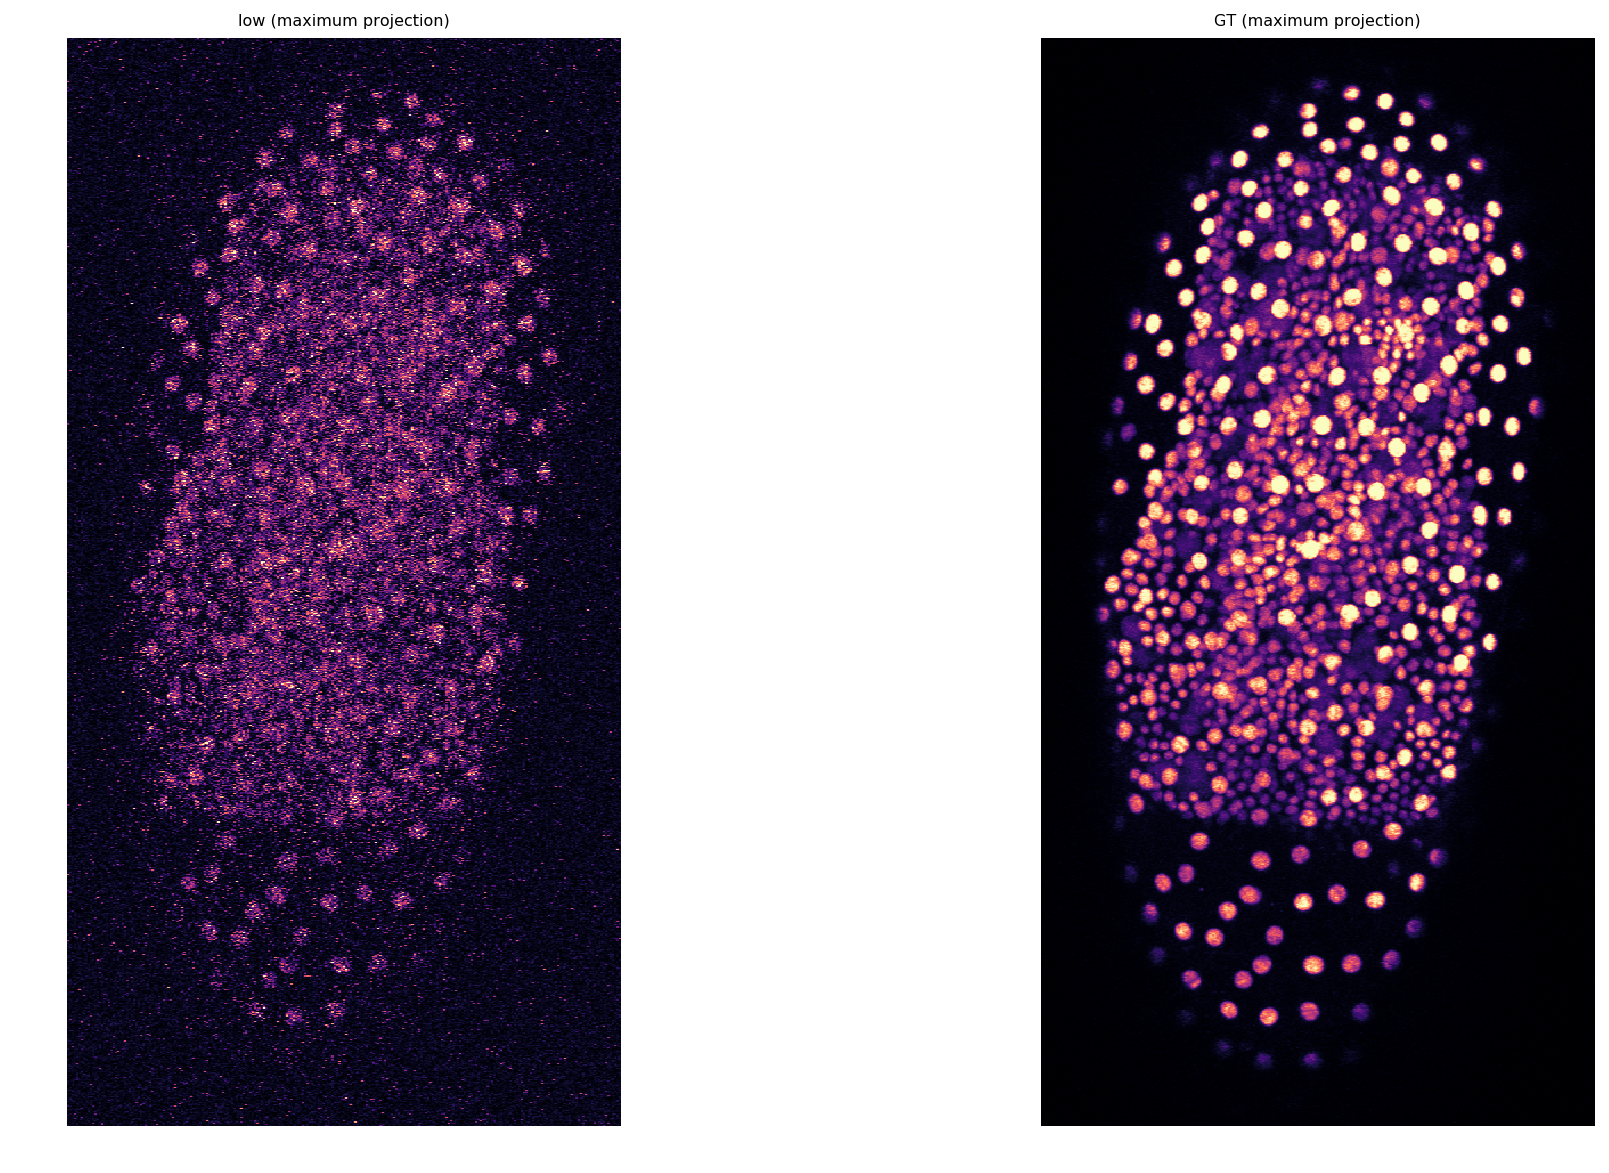

In [12]:
y = imread('data/tribolium/test/GT/nGFP_0.1_0.2_0.5_20_14_late.tif')
x = imread('data/tribolium/test/low/nGFP_0.1_0.2_0.5_20_14_late.tif')

axes = 'ZYX'
print('image size =', x.shape)
print('image axes =', axes)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,y]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

<hr style="height:2px;">

# CARE model - our data

Load trained model (located in base directory `models` with name `my_model`) from disk.  
The configuration was saved during training and is automatically loaded when `CARE` is initialized with `config=None`.

In [14]:
model = CARE(config=None, name='my_model_steps_ep_200', basedir='models')

Loading network weights from 'weights_best.h5'.


## Apply CARE network to raw image

Predict the restored image (image will be successively split into smaller tiles if there are memory issues).

In [ ]:
#creation fake noise
noise =  np.random.normal(loc=0, scale=1, size=(220,220,1))

In [ ]:
#recontruction and plot
restored = model.predict(noise, axes)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(noise[:,:,0],cmap='gray')
plt.title('Noisy image')
plt.subplot(1,2,2)
plt.imshow(restored[:,:,0],cmap='gray')
plt.title('Restored')
plt.savefig('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/noisy.png')

In [ ]:
for file in os.listdir('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/nina/'):
    print(file)

In [40]:
for file in sorted(os.listdir(PATH_x)):
    print(file)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Tru

In [ ]:
PATH_x = '/stornext/Img/data/prkfs1/m/Microscopy/LLS/Daryan/20190407/M101_D7_37deg_1_5_ml_mg_GLUT_100000cells/sample1/stack1/GPUdecon/'
PATH_y = '/stornext/Img/data/prkfs1/m/Microscopy/LLS/Daryan/20190407/M101_D7_37deg_1_5_ml_mg_GLUT_100000cells/sample1/stack1/GPUdecon/denoised/'
axes = 'ZYX'

for file in os.listdir(PATH_x):
    if (file.startswith('1')):
        print('Reading: ',PATH_x+file)
        x = imread(PATH_x+file)
        #x = np.expand_dims(x,axis=3)
        #mid = int(x.shape[0]/2)
        #restored_1 = model.predict(x[1:mid], axes)
        restore = model.predict(x,axes)
        #restored = np.concatenate((restored_1,restored_2),axis=0)
        imsave(PATH_y+file, restore)

Reading:  /stornext/Img/data/prkfs1/m/Microscopy/LLS/Daryan/20190407/M101_D7_37deg_1_5_ml_mg_GLUT_100000cells/sample1/stack1/GPUdecon/1_CamA_ch1_stack0041_561nm_0104136msec_0013651635msecAbs_decon.tif


In [6]:
im=[]
PATH_x = '/stornext/Img/data/prkfs1/m/Microscopy/LLS/Cindy/20190524/stack_6/GPUdecon/MIPs/'
for file in sorted(os.listdir(PATH_x)):
    print(file.startswith('45_CamA_ch0'))
    if file.startswith('45_CamA_ch0'):
        print('Reading file: ',file)
        x = imread(PATH_x+file)
        im.append(x)


True
Reading file:  45_CamA_ch0_stack0000_488nm_0000000msec_0011758496msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0001_488nm_0005000msec_0011763496msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0002_488nm_0009999msec_0011768495msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0003_488nm_0014999msec_0011773495msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0004_488nm_0019999msec_0011778495msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0005_488nm_0024999msec_0011783495msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0006_488nm_0029999msec_0011788495msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0007_488nm_0034998msec_0011793494msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0008_488nm_0039998msec_0011798494msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0009_488nm_0044998msec_0011803494msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0010_488nm_0049998msec_0011808494msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_

True
Reading file:  45_CamA_ch0_stack0095_488nm_0474978msec_0012233474msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0096_488nm_0479978msec_0012238474msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0097_488nm_0484978msec_0012243474msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0098_488nm_0489978msec_0012248474msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0099_488nm_0494977msec_0012253473msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0100_488nm_0499977msec_0012258473msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0101_488nm_0504977msec_0012263473msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0102_488nm_0509977msec_0012268473msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0103_488nm_0514976msec_0012273472msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0104_488nm_0519976msec_0012278472msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0105_488nm_0524976msec_0012283472msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_

True
Reading file:  45_CamA_ch0_stack0190_488nm_0949957msec_0012708453msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0191_488nm_0954956msec_0012713452msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0192_488nm_0959956msec_0012718452msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0193_488nm_0964956msec_0012723452msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0194_488nm_0969956msec_0012728452msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0195_488nm_0974955msec_0012733451msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0196_488nm_0979955msec_0012738451msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0197_488nm_0984955msec_0012743451msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0198_488nm_0989955msec_0012748451msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0199_488nm_0994954msec_0012753450msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0200_488nm_0999954msec_0012758450msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_

True
Reading file:  45_CamA_ch0_stack0291_488nm_1454933msec_0013213429msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0292_488nm_1459933msec_0013218429msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0293_488nm_1464933msec_0013223429msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0294_488nm_1469933msec_0013228429msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0295_488nm_1474933msec_0013233429msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0296_488nm_1479932msec_0013238428msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0297_488nm_1484932msec_0013243428msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0298_488nm_1489932msec_0013248428msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0299_488nm_1494932msec_0013253428msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0300_488nm_1499931msec_0013258427msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0301_488nm_1504931msec_0013263427msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_

True
Reading file:  45_CamA_ch0_stack0386_488nm_1929912msec_0013688408msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0387_488nm_1934912msec_0013693408msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0388_488nm_1939911msec_0013698407msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0389_488nm_1944911msec_0013703407msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0390_488nm_1949911msec_0013708407msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0391_488nm_1954911msec_0013713407msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0392_488nm_1959910msec_0013718406msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0393_488nm_1964910msec_0013723406msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0394_488nm_1969910msec_0013728406msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0395_488nm_1974910msec_0013733406msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0396_488nm_1979910msec_0013738406msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_

True
Reading file:  45_CamA_ch0_stack0483_488nm_2414890msec_0014173386msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0484_488nm_2419890msec_0014178386msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0485_488nm_2424889msec_0014183385msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0486_488nm_2429889msec_0014188385msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0487_488nm_2434889msec_0014193385msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0488_488nm_2439889msec_0014198385msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0489_488nm_2444888msec_0014203384msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0490_488nm_2449888msec_0014208384msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0491_488nm_2454888msec_0014213384msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0492_488nm_2459888msec_0014218384msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_stack0493_488nm_2464887msec_0014223383msecAbs_MIP_z.tif
True
Reading file:  45_CamA_ch0_

In [7]:
I = np.array(im)

In [68]:
x = imread(PATH_x)

In [8]:
axes = 'ZYX'

In [8]:
I[180:280].shape

(100, 1024, 672)

In [33]:
PATH_x = '/stornext/Img/data/prkfs1/m/Microscopy/LLS/Daryan/20190407/M101_D7_37deg_1_5_ml_mg_GLUT_100000cells/sample1/stack1/GPUdecon/1_CamA_ch0_stack0000_488nm_0000000msec_0013547499msecAbs_decon.tif'

In [34]:
x_2 = imread(PATH_x)

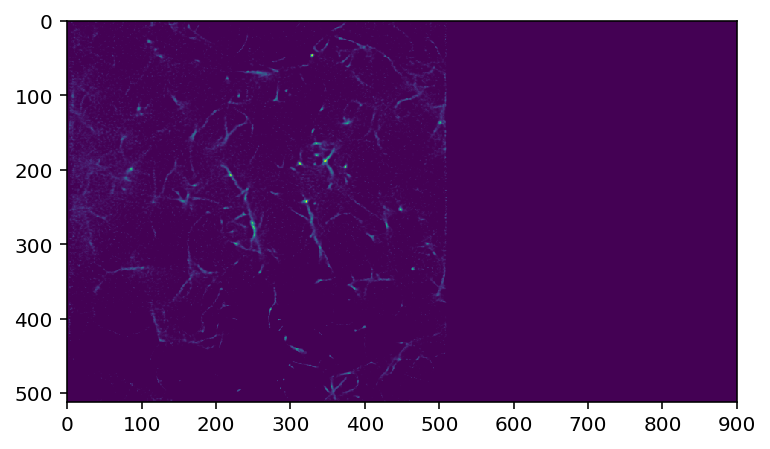

In [35]:
plt.imshow(x_2[5,:,:])

In [36]:
axes = 'ZXY'
restored = model.predict(x_2, axes)
imsave('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/res_col_2.tif', restored)

In [ ]:
#path of input images
PATH_x = '/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/DATA/data_lattice/stack_1/GPUdecon/noisy/'
axes = 'ZYXC'
print(len(axes))
for file in os.listdir(PATH_x+'Input/'):
    x = imread(PATH_x+'Input/'+file)
    print(file)
    #read ground truth (if you have it) for later evaluation
    #PATH_y = '/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/DATA/data_lattice/stack_3/GPUdecon/clean/44_CamA_ch1_stack0000_488nm_0000000msec_0003008042msecAbs_decon.tif'
    #y = imread(PATH_y)

    #control input shape
    #print('Shape of input: ', x.shape)

    #prediction using pretrained CARE model - loop over time
    start = time.time()  
    channel = 1
    im_list = []
    for ch in range(channel):
        print(x.shape[0])
        restored = [model.predict(x[t,:,:], axes) for t in range(x.shape[0])]
        #shape for cindy invasions
        #restored = [model.predict(x[t,:,ch,:,:], axes) for t in range(x.shape[0])]
        full_image = [np.expand_dims(r, axis=0) for r in restored]
        full_image = np.concatenate(full_image)
        im_list.append(full_image)
    #when several channels to concatenate
    #IM = np.concatenate(np.expand_dims(im_list,axis=3),axis=2)
    IM=im_list[0]
    end = time.time()
    print('reconstruction done')
    print('Execution time %s sec ' %(end - start))

    #control output shape
    #print('Shape of ouput (restored): ', full_image.shape)
    print('saving')
    imsave(PATH_x+'Output/'+file,IM)

In [ ]:
IM=im_list[0]

In [ ]:
imsave(PATH_x+'Output/'+file,IM)

Alternatively, one can directly set `n_tiles` to avoid the time overhead from multiple retries in case of memory issues.

**Note**: *Out of memory* problems during `model.predict` can also indicate that the GPU is used by another process. In particular, shut down the training notebook before running the prediction (you may need to restart this notebook).

In [9]:
%%time
axes = 'ZYX'
restored = model.predict(x, axes, n_tiles=(1,4,4))

 75%|███████▌  | 12/16 [04:04<01:28, 22.13s/it]  

KeyboardInterrupt: 

In [ ]:
path = '/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/DATA/data_lattice/stack_3/GPUdecon/'
for file in os.listdir(path+'clean/'):
    x = imread(path+'noisy/'+file)
    y = imread(path+'clean/'+file)
    %%time
    restored = model.predict(x, axes, n_tiles=(1,4,4))
    save_tiff_imagej_compatible(path+'results/'+file , restored, axes)

## Save restored image

Save the restored image stack as a ImageJ-compatible TIFF image, i.e. the image can be opened in ImageJ/Fiji with correct axes semantics.

In [ ]:
PATH_output = '/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/nina/results/'
imsave(PATH_output+'res_cindy_full.tif',IM)

In [ ]:
np.expand_dims(im_saved,axis=0).shape

In [ ]:
#control of saved image
im_saved = imread('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/DATA/data_lattice/pix2pix/B/train/2098.tif')
restored = model.predict(np.expand_dims(im_saved,axis=0), axes, n_tiles=(1,4,4))
print('Shape of image saved: ',im_saved.shape)

In [ ]:
restored[0,:,:].shape

In [ ]:
plt.imshow(restored[0,:,:])
plt.savefig('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/I1.jpg')
plt.imshow(im_saved)
plt.savefig('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/I2.jpg')


In [ ]:
Path('results').mkdir(exist_ok=True)
save_tiff_imagej_compatible('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/nina/results/res.tif', full_image, axes)

<hr style="height:2px;">

# Raw low/high-SNR image and denoised image via CARE network

Plot the test stack pair and the predicted restored stack (middle).

In [5]:
full_image.shape

NameError: name 'full_image' is not defined

In [6]:
x.shape

NameError: name 'x' is not defined

In [7]:
restored.shape

NameError: name 'restored' is not defined

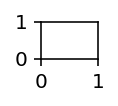

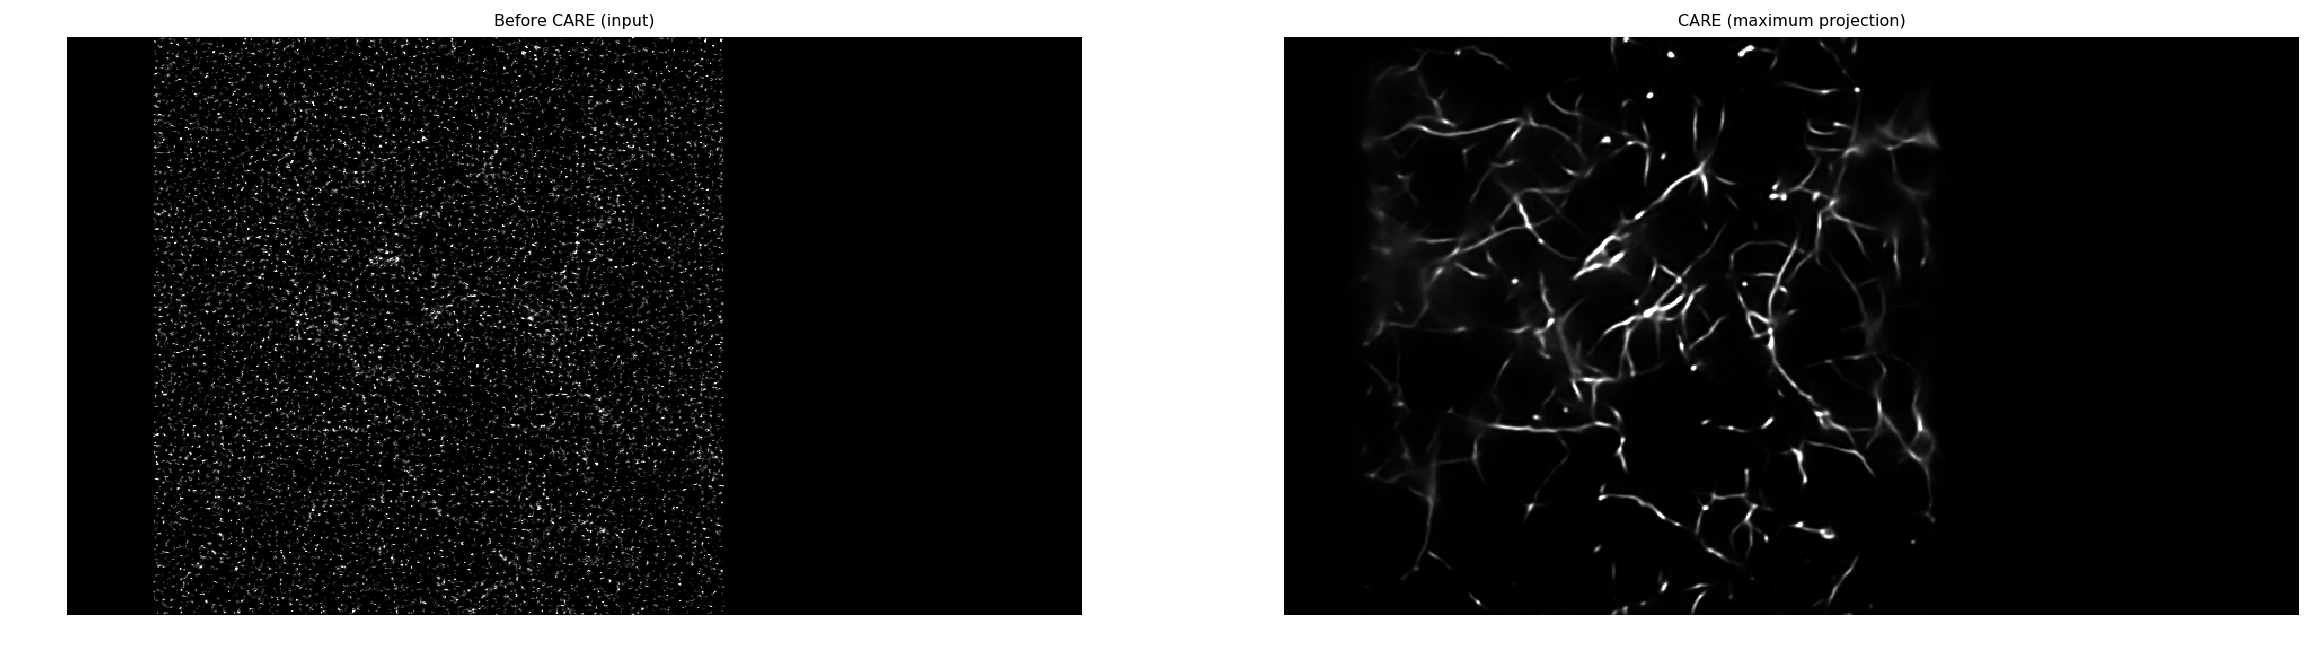

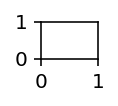

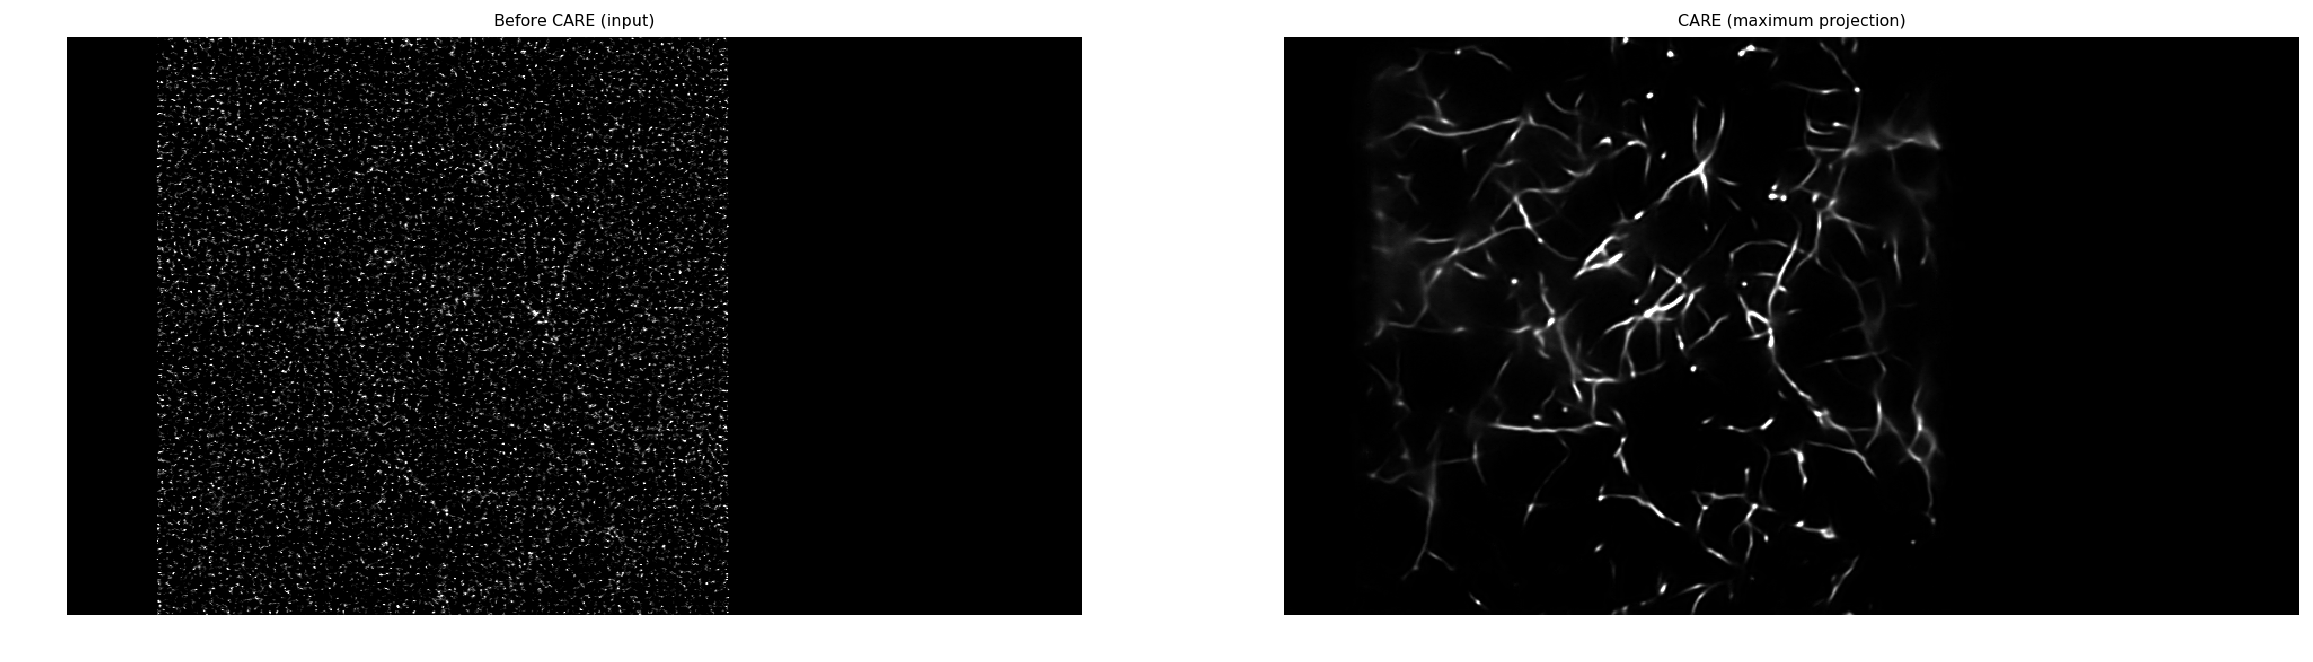

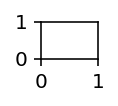

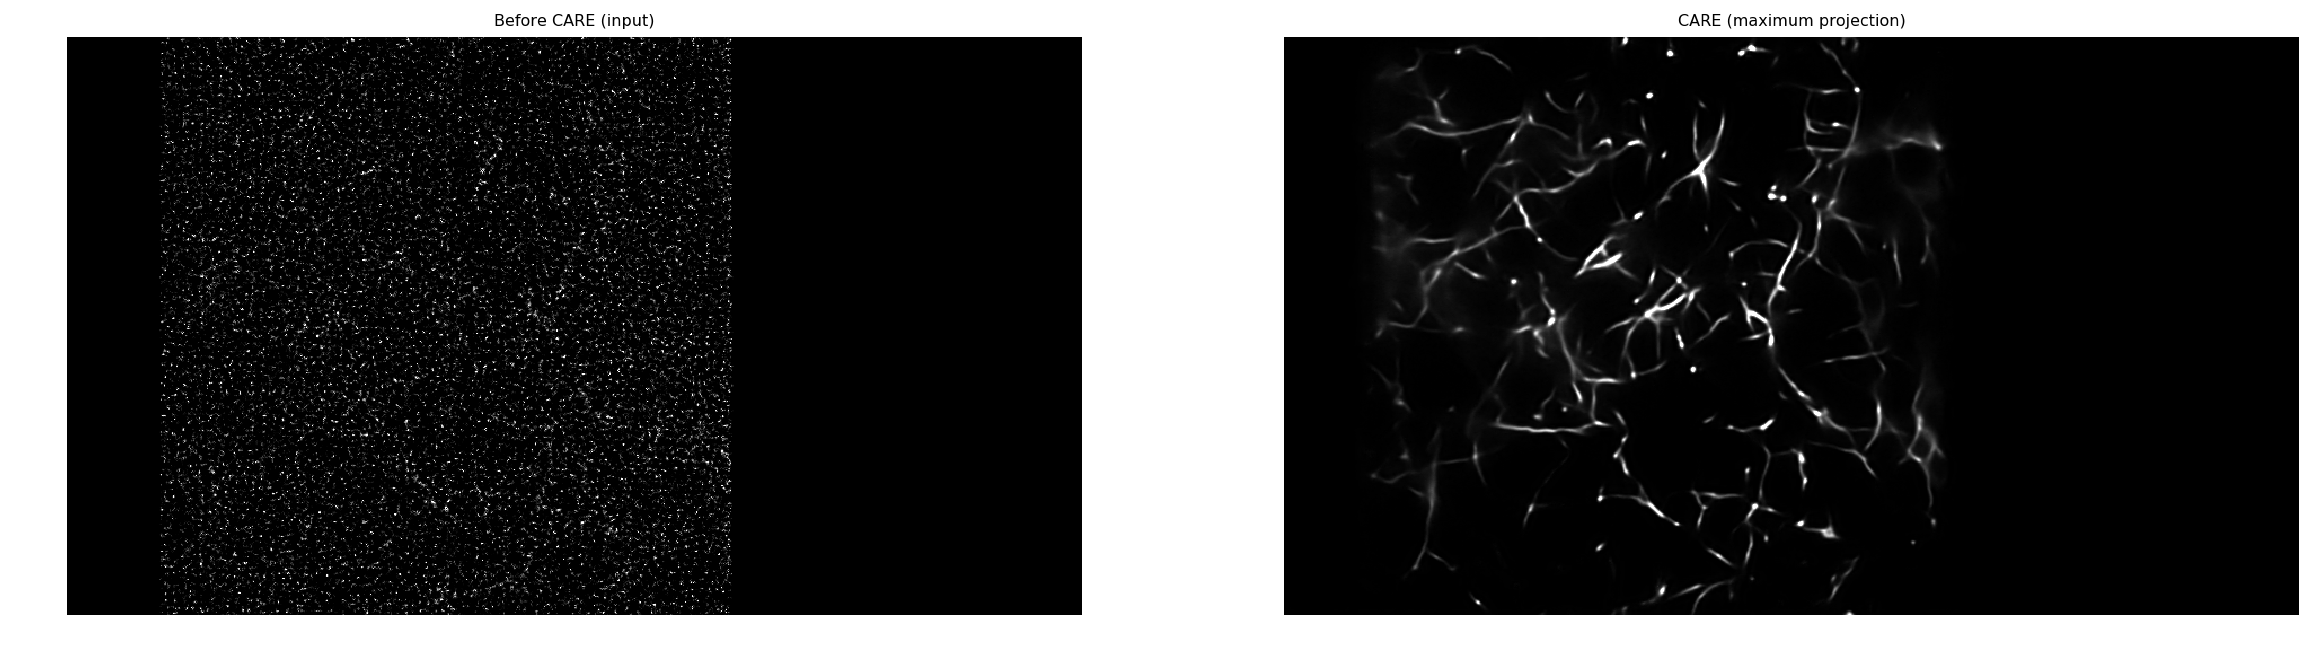

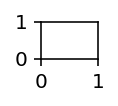

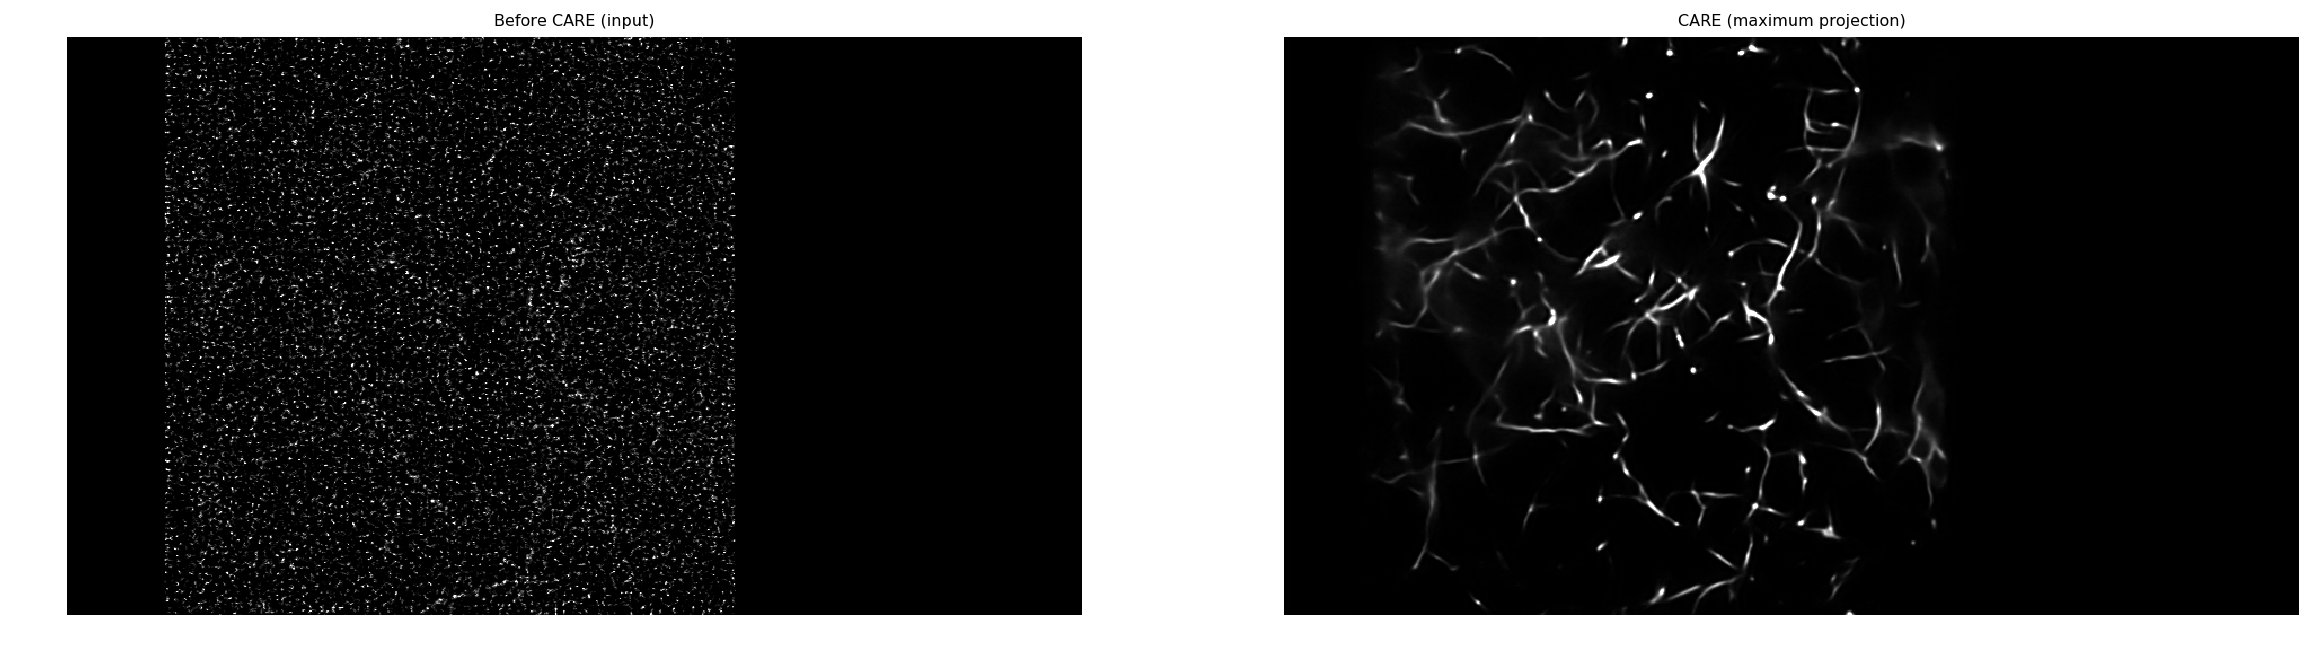

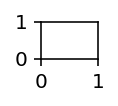

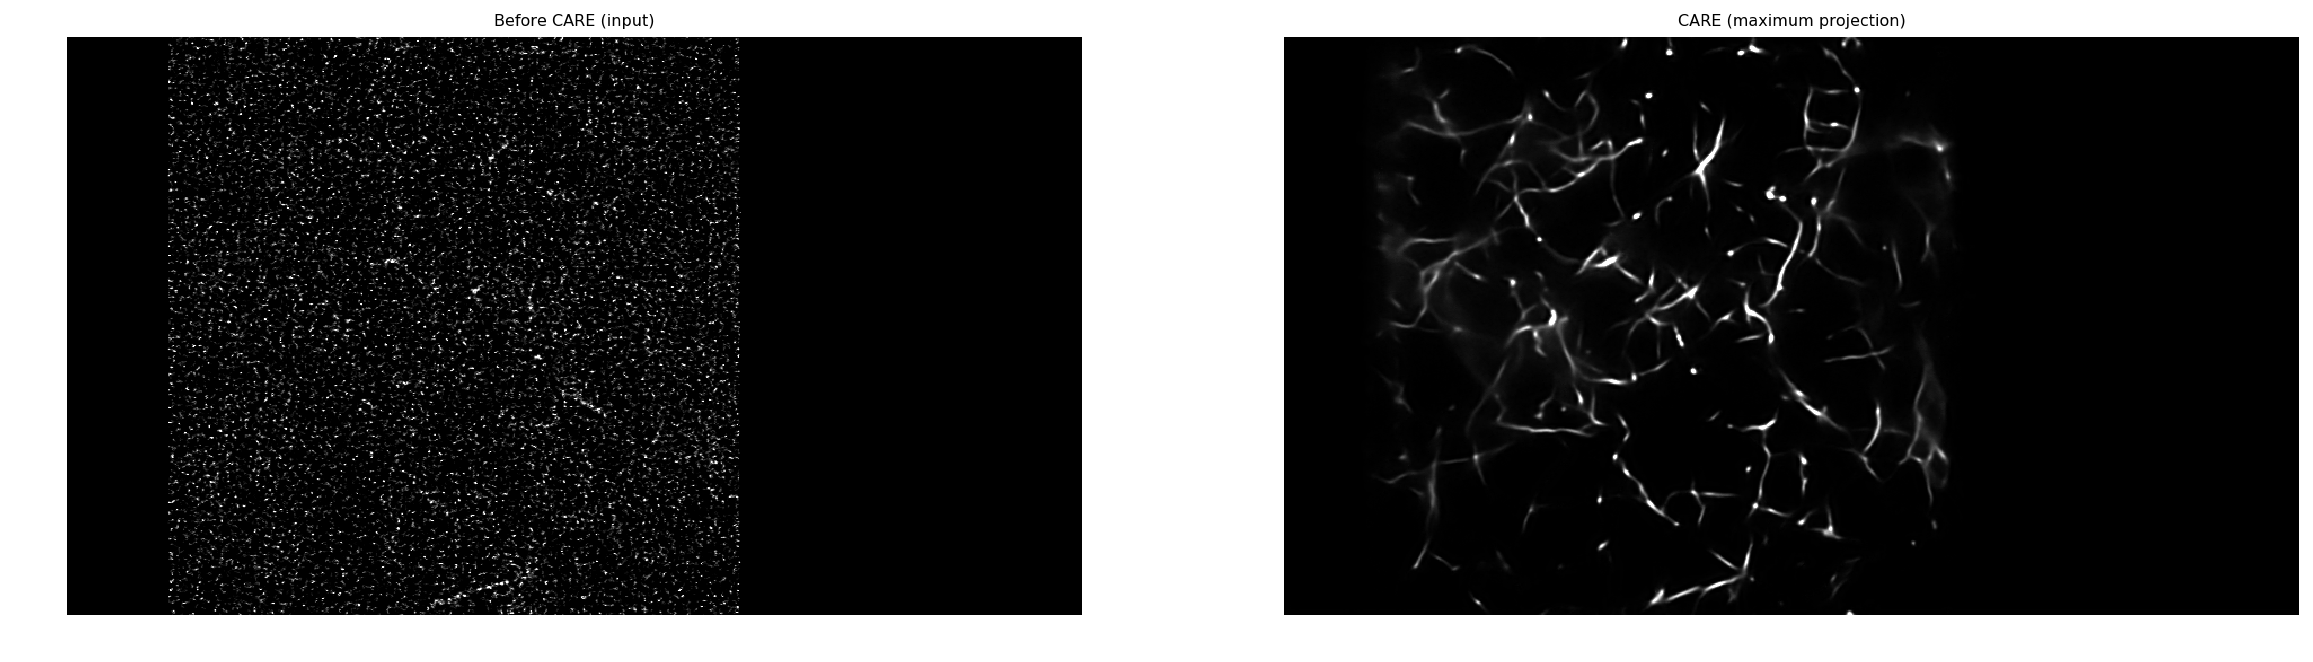

In [37]:
#plot the results
for i in range(25,30):
    plt.subplot(10,  10,i+1)
    plt.figure(figsize=(20,20))
    plot_some(np.stack([x[i+2,:,:],restored[i,:,:]]),
          title_list=[['Before CARE (input)','CARE (maximum projection)']], 
          pmin=2,pmax=99.8)
    plt.show()
    #if (i==25):
        #plt.savefig('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/im.jpg',x[i,:,0,:,:])
        #plt.savefig('/stornext/Img/data/prkfs1/m/Microscopy/Nina_Tubau/im2.jpg',full_image[i,:,:,:])